In [1]:
import pandas as pd, numpy as np, gensim, pickle, spacy, urllib.request
import nltk.tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
sentences = Corpus("data/preprocessed.txt")

In [46]:
%%time
word2vec = gensim.models.Word2Vec(min_count=10,
                                  sentences= data.text,
                                 size=16,
                                 workers=4)

CPU times: user 21min 25s, sys: 5.56 s, total: 21min 30s
Wall time: 11min 10s


In [0]:
word2vec.wv.vocab

In [0]:
fp = open("word2vec", "wb")
pickle.dump(word2vec, fp)
fp.close()

In [0]:
fp = open("/content/drive/My Drive/Colab Notebooks/IFT6285/TP3/word2vec_no_preprocess_10", "rb")
word2vec = pickle.load(fp)
fp.close()

In [0]:
url = 'http://www-labs.iro.umontreal.ca/~felipe/IFT6285-Automne2019/resources/tp2/train_posts.csv'
response = urllib.request.urlopen(url)
data = pd.read_csv(response, header=None)

In [0]:
word2vec = gensim.models.Word2Vec(min_count=10,
                                #   sentences= [s.split() for s in nltk.tokenize.sent_tokenize(data.values[0,0])],
                                  sentences = nltk.tokenize.sent_tokenize(data.values[0,0]),
                                 size=16,
                                 workers=4)

In [0]:
class Sentence:
    def __init__(self, posts):
        self.posts = posts
    
    def __iter__(self):
        for post in self.posts:
            for sent in nltk.tokenize.sent_tokenize(post):
                yield nltk.tokenize.word_tokenize(sent)
class Word:
    def __init__(self, posts):
        self.posts = posts
    
    def __iter__(self):
        for post in self.posts:
            for sent in nltk.tokenize.sent_tokenize(post):
                for word in nltk.tokenize.word_tokenize(sent):
                    yield word

In [0]:
from collections import Counter
counter = Counter()
for word in Word(data.values[:,0]):
    counter[word] +=1

In [52]:
counter["gradient"]

34

In [0]:
iter_sent = Sentence(data.values[:,0])

In [0]:
word2vec = gensim.models.Word2Vec(  min_count=10,
                                    sentences = iter_sent,
                                    size=16,
                                    workers=4)

In [0]:
fp = open("/content/drive/My Drive/Colab Notebooks/IFT6285/TP3/word2vec_no_preprocess_10", "wb")
pickle.dump(word2vec, fp)
fp.close()

In [66]:
len([(word, dist) for word, dist in word2vec.wv.most_similar("chris", topn=1000) if dist > 0.85])
# np.linalg.norm(word2vec.wv["salt"]  word2vec.wv["sugar"] )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


557

In [45]:
np.linalg.norm(word2vec.wv["kimanng"] - word2vec.wv["computer"])

16.975603

In [86]:
word2vec.wv.most_similar("eaten")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('smoked', 0.8839665651321411),
 ('cooked', 0.8360577821731567),
 ('digested', 0.8306688070297241),
 ('baked', 0.8188643455505371),
 ('worn', 0.8151932954788208),
 ('consumed', 0.8106551766395569),
 ('grilled', 0.8103232383728027),
 ('drank', 0.8034592866897583),
 ('ingested', 0.8027732372283936),
 ('ridden', 0.8027575016021729)]

In [45]:
with open("/content/drive/My Drive/Colab Notebooks/IFT6285/TP3/voisins.txt", "w") as f:
    for word in ["chris", "john", "government", "iraq", "actor", "king", "man", "computer", "coffee", "tree", "paper", "chair", "run", "homework", "trump", "endurance", "newspaper",
                 "shoes", "jacket", "parameters", "heat", "eat", "eaten", "wall", "frame", "plane", "whisky", "january", "monday", "food", "word", "vector", "gradient",
                 "bible", "emoji", "forest", "sea", "horse", "whale", "cable", "internet", "lamp", "lighter", "trash", "jelly", "tooth", "soccer", "mouse", "arm",
                 "company", "electricity", "wok", "work", "business", "metal", "curry", "kentucky", "beer", "bear", "vodka", "tube", "subway", "train", "gentle",
                 "world", "map", "compass", "reeves", "math", "geography", "cancun", "marseille", "depardieu", "louis", "awesome", "generic", "chill", "soup",
                 "mario", "xbox", "fridge", "parliament", "law", "crash", "violin", "tower", "direction", "stress", "brain", "tornado", "wait", "pattern",
                 "queue", "saloon", "option", "see", "assume", "disorder", "positive", "feedback"]:
        tmp = [(w, dist) for w, dist in word2vec.wv.most_similar(word, topn=100000) if dist > 0.8]
        f.write("{:15}".format(word) + "\t")
        f.write("{:5d}".format(len(tmp)) + "\t")
        for i, (w, _) in enumerate(tmp):

            f.write(w + '[] ')
            if i == 5:
                break
        f.write("\n")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



In [0]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(word2vec)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

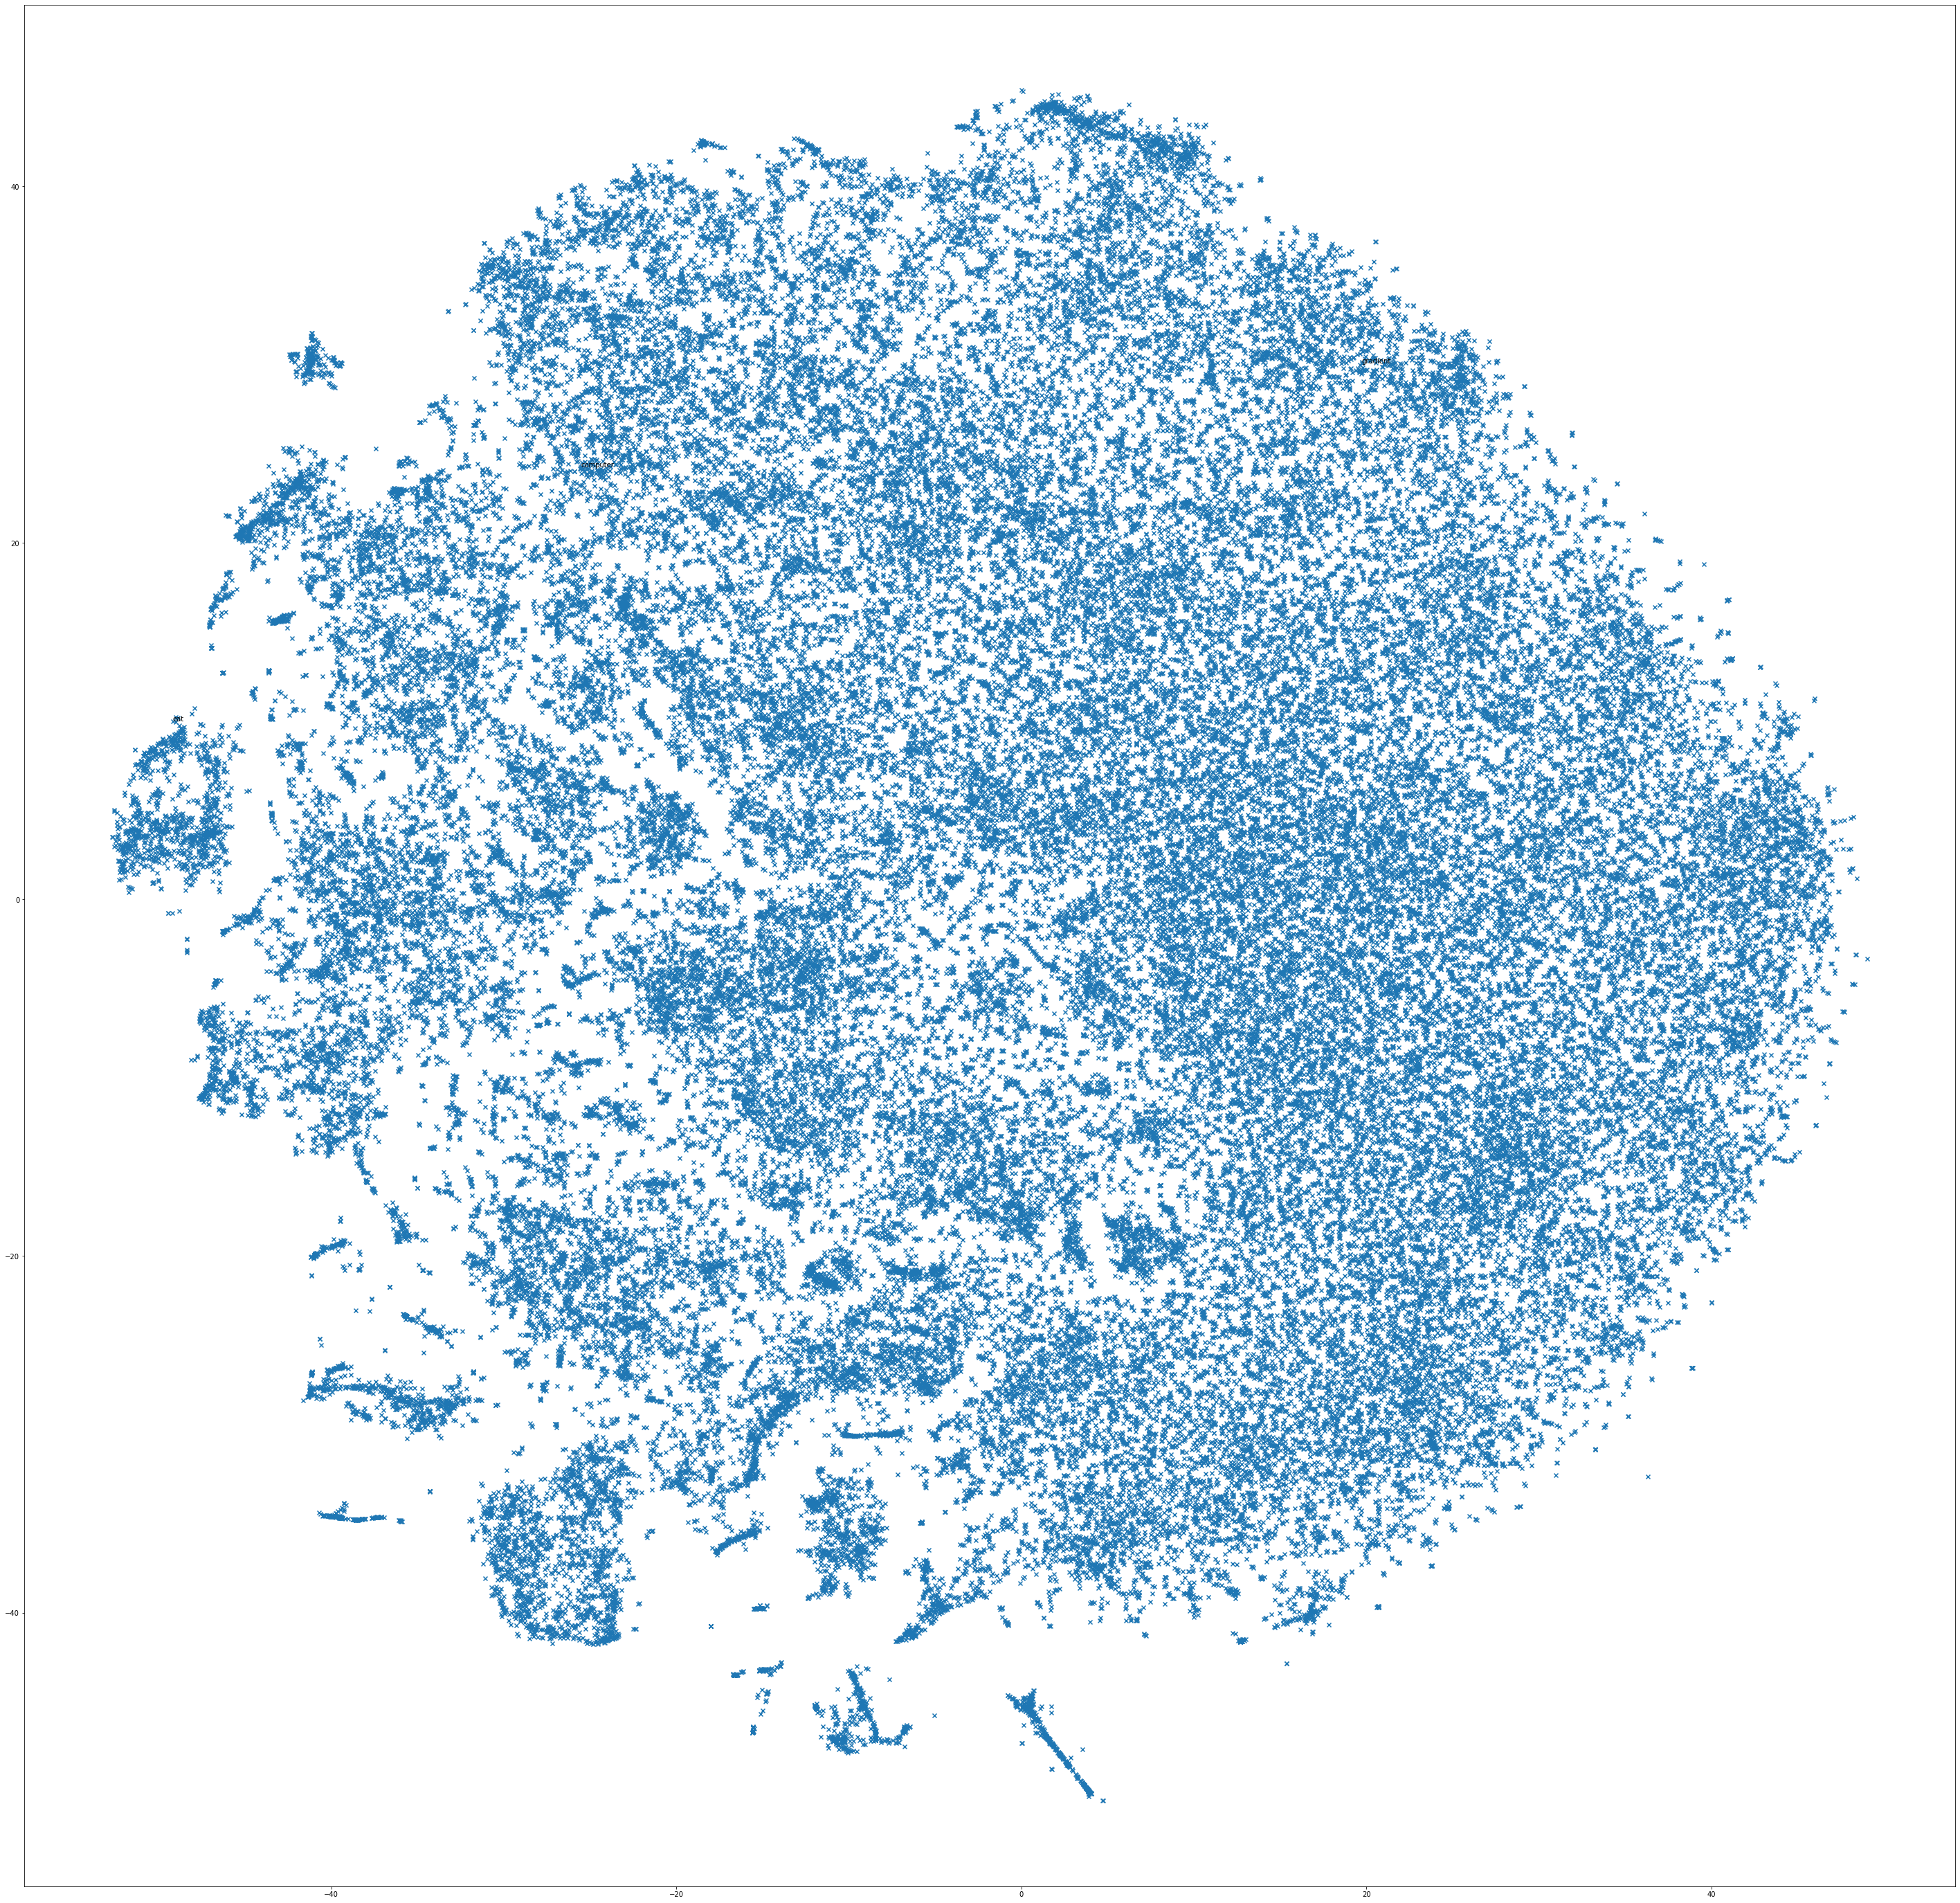

In [60]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(50, 50))
    plt.scatter(x_vals, y_vals, marker='x')

    #
    # Label randomly subsampled 25 data points
    #
    selected_indices = []
    for word in ["computer", "gradient", "eat"]:
        selected_indices.append(np.argwhere(labels == word).item())
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))


plot_with_matplotlib(x_vals, y_vals, labels)

In [59]:
np.argwhere(labels == "computer").item()

24